In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from preprocessing import preprocessing
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [48]:
df = preprocessing('marketing_campaign.csv')

2233


#### Sturges' rule

In [49]:
bins = int(1 + 3.322 * np.log10(len(df)))

#### Histrogram: Distribution of Age

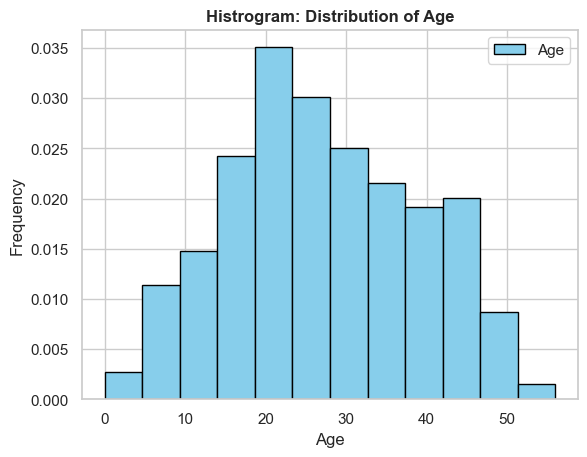

In [50]:
plt.hist(df['Age'], bins=12, density=True, color='skyblue', ec='black', label='Age')
plt.title("Histrogram: Distribution of Age", fontweight='bold')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend()
plt.show()

#### Pie Chart

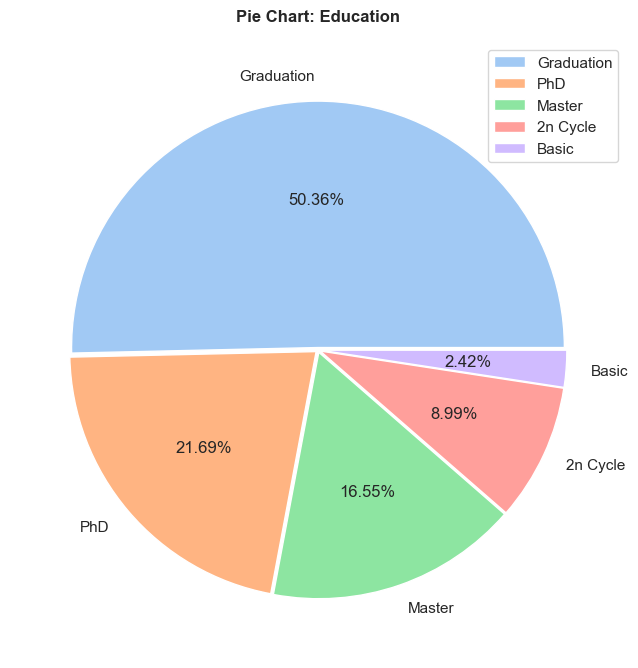

In [51]:
education_array = np.array(df['Education'].value_counts())
education_labels = df['Education'].value_counts().index

colors = sns.color_palette('pastel')
plt.figure(figsize=(8,8))
plt.pie(education_array, labels=education_labels, colors=colors, autopct='%.2f%%', labeldistance=1.1, explode=[0.01, 0.01, 0.01, 0.01 , 0.01])
plt.title("Pie Chart: Education", fontweight='bold', pad=15)
plt.legend(loc='upper right')
plt.show()

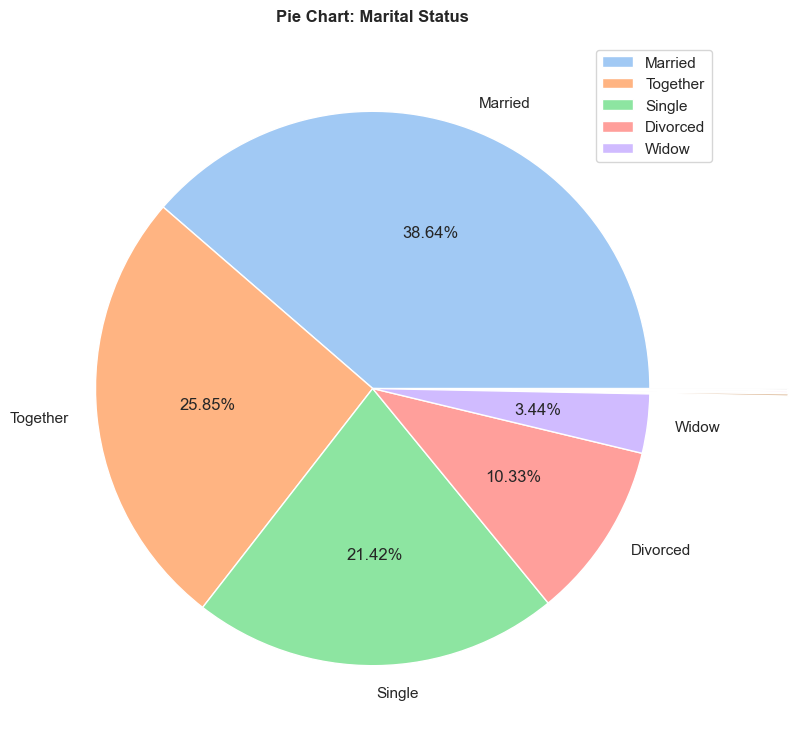

In [52]:
marital_counts = df['Marital_Status'].value_counts()
marital_array = np.array(marital_counts)
marital_labels = list(marital_counts.index)
explode = [0.0]*5 + [0.5]*3
pie_labels = marital_labels[:5] + ['']*3

def custom_autopct(pct, allvals):
    index = custom_autopct.counter
    custom_autopct.counter += 1
    if index < len(allvals) - 3:
        return f'{pct:.2f}%'
    else:
        return ''
custom_autopct.counter = 0

colors = sns.color_palette('pastel')

plt.figure(figsize=(9, 9))
patches, texts, autotexts = plt.pie(
    marital_array,
    labels=pie_labels,
    colors=colors,
    autopct=lambda pct: custom_autopct(pct, marital_array),
    explode=explode
)

plt.legend(patches[:5], marital_labels[:5], loc='upper right')
plt.title("Pie Chart: Marital Status", fontweight='bold', pad=15)
plt.show()

### Boxplot: Income by Education

/Users/ayoucruz/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/ayoucruz/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/ayoucruz/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


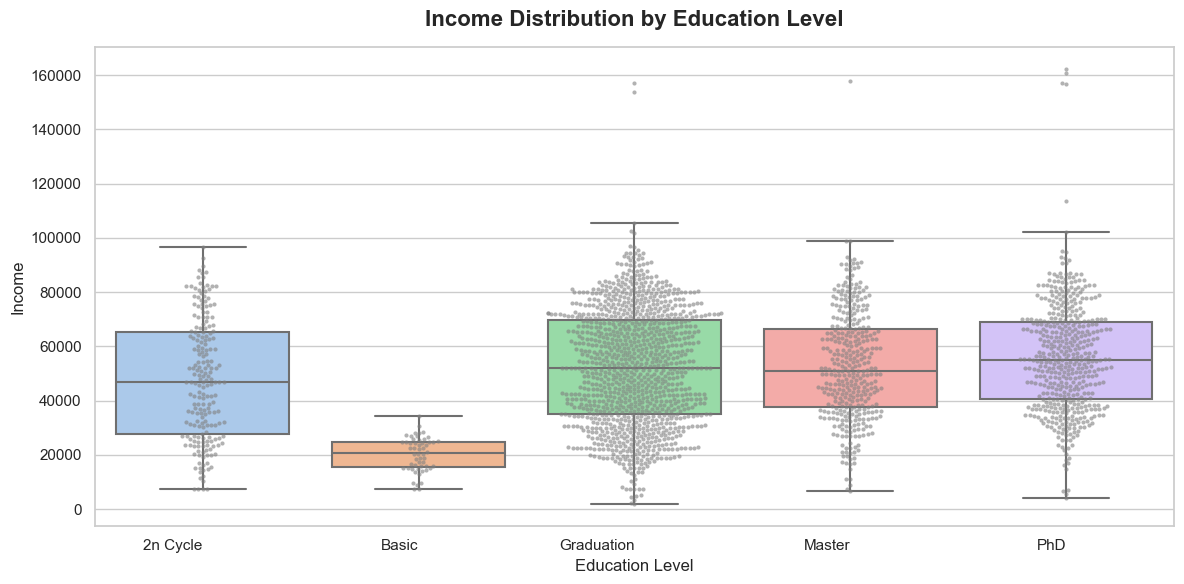

In [53]:
sns.set(style="whitegrid")
sorted_edu = sorted(df['Education'].unique(), key=lambda x: str(x))
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Education', y='Income', order=sorted_edu, palette='pastel', showfliers=False)
sns.swarmplot(data=df, x='Education', y='Income', order=sorted_edu, color='gray', alpha=0.6, size=3)

plt.title("Income Distribution by Education Level", fontsize=16, fontweight='bold', pad=15)
plt.xlabel("Education Level", fontsize=12)
plt.ylabel("Income", fontsize=12)
plt.xticks(rotation=0, ha='right')
plt.tight_layout()
plt.show()


### Boxplot: Income by Marital Status

/Users/ayoucruz/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/ayoucruz/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/ayoucruz/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/ayoucruz/miniconda3/lib/python3.11/site-packages/seaborn/categorical.py:3544: UserWarning: 8.3% of the points

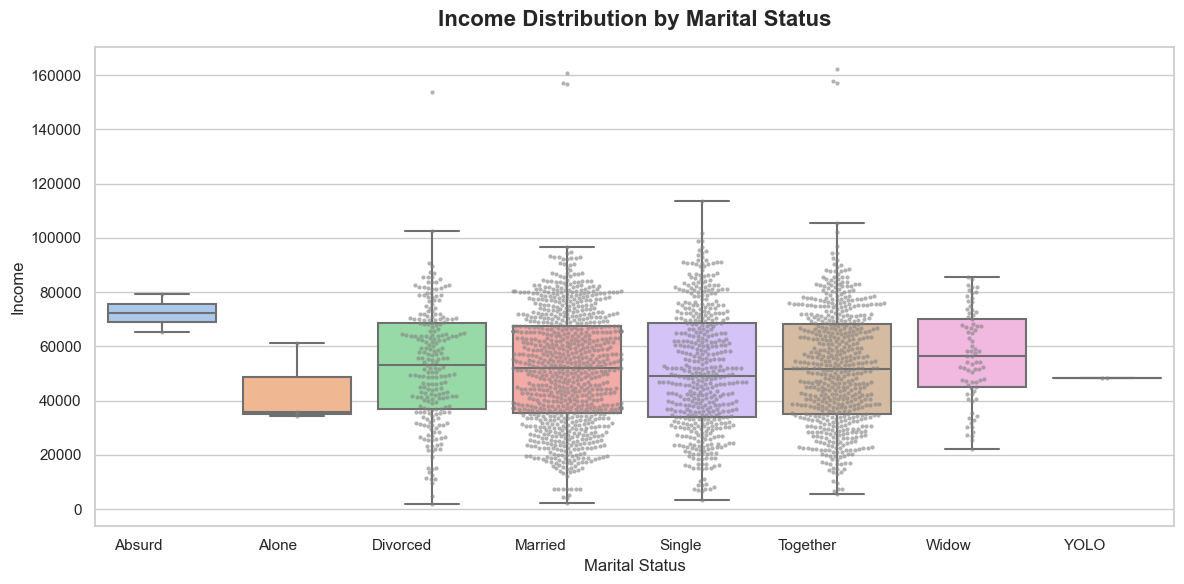

In [54]:
sorted_marital = sorted(df['Marital_Status'].unique(), key=lambda x: str(x))

plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Marital_Status', y='Income', order=sorted_marital, palette='pastel', showfliers=False)
sns.swarmplot(data=df, x='Marital_Status', y='Income', order=sorted_marital, color='gray', alpha=0.6, size=3)

plt.title("Income Distribution by Marital Status", fontsize=16, fontweight='bold', pad=15)
plt.xlabel("Marital Status", fontsize=12)
plt.ylabel("Income", fontsize=12)
plt.xticks(rotation=0, ha='right')
plt.tight_layout()
plt.show()

In [55]:
df[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']]

,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
0,635,88,546,172,88,88
1,11,1,6,2,1,6
2,426,49,127,111,21,42
3,11,4,20,10,3,5
4,173,43,118,46,27,15
...,...,...,...,...,...,...
2235,709,43,182,42,118,247
2236,406,0,30,0,0,8
2237,908,48,217,32,12,24
2238,428,30,214,80,30,61


In [56]:
conditions = [
    df['Income'] <= 20000,
    (df['Income'] > 20000) & (df['Income'] <= 40000),
    (df['Income'] > 40000) & (df['Income'] <= 60000),
    (df['Income'] > 60000) & (df['Income'] <= 80000),
    (df['Income'] > 80000) & (df['Income'] <= 100000),
    df['Income'] > 100000
]

choices = ['20K', '20K–40K', '40K–60K', '60K–80K', '80K-100k', '100k']
df['Group Income'] = np.select(conditions, choices)

In [57]:
df['Age'].min()

0

In [58]:
conditions_age = [
    df['Age'] <= 10,
    (df['Age'] > 10) & (df['Age'] <= 20),
    (df['Age'] > 20) & (df['Age'] <= 30),
    (df['Age'] > 30) & (df['Age'] <= 40),
    (df['Age'] > 40) & (df['Age'] <= 50),
    df['Age'] > 50
]

choices_age = ['10','10-20','20-30','30-40','40-50','50']
df['Group Age'] = np.select(conditions_age, choices_age)

In [59]:
df['Household Size'] = df['Kidhome'] + df['Teenhome']

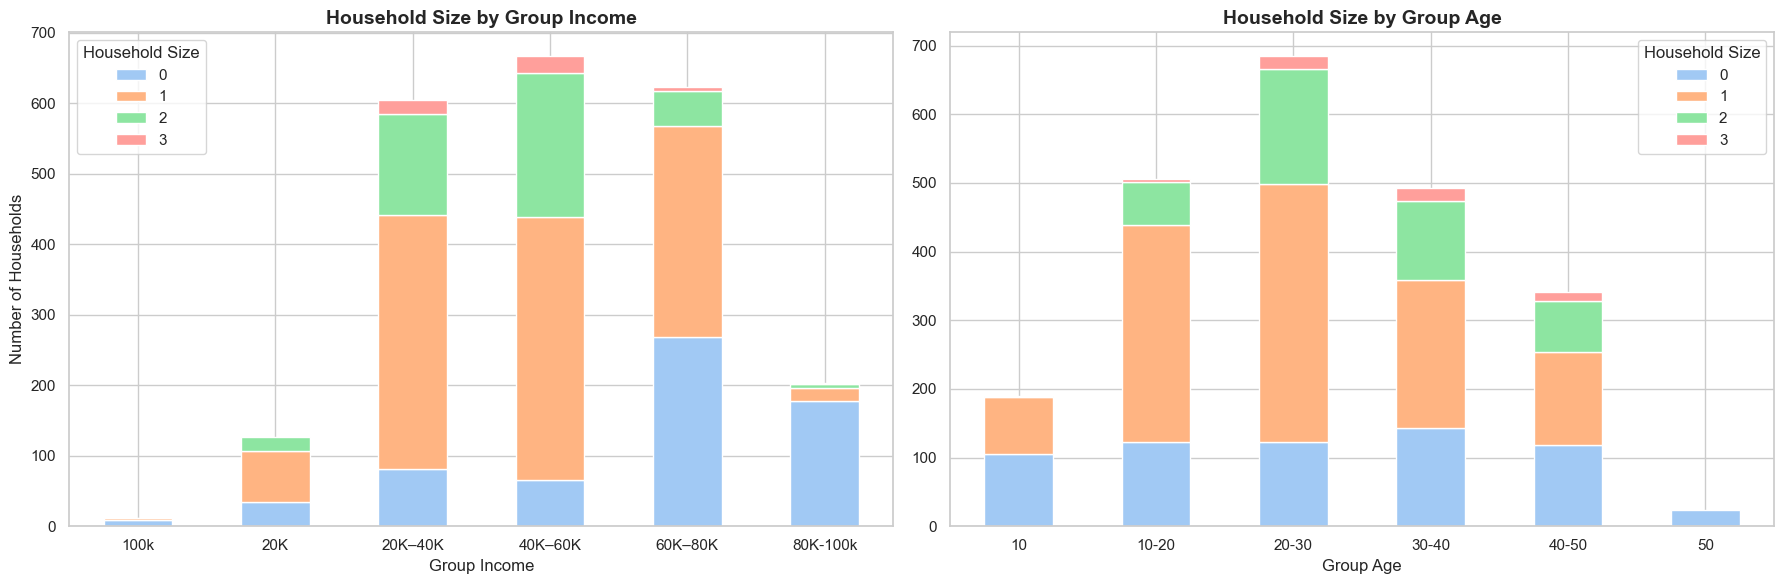

In [60]:
counts_income = df.groupby(['Group Income', 'Household Size']).size().unstack(fill_value=0)
colors_income = sns.color_palette("pastel", n_colors=len(counts_income.columns))

counts_age = df.groupby(['Group Age', 'Household Size']).size().unstack(fill_value=0)
colors_age = sns.color_palette("pastel", n_colors=len(counts_age.columns))

fig, axes = plt.subplots(1, 2, figsize=(18, 6))

counts_income.plot(kind='bar', stacked=True, color=colors_income, ax=axes[0])
axes[0].set_title("Household Size by Group Income", fontsize=14, fontweight='bold')
axes[0].set_xlabel("Group Income")
axes[0].set_ylabel("Number of Households")
axes[0].tick_params(axis='x', rotation=0)
axes[0].legend(title="Household Size", loc='upper left')

counts_age.plot(kind='bar', stacked=True, color=colors_age, ax=axes[1])
axes[1].set_title("Household Size by Group Age", fontsize=14, fontweight='bold')
axes[1].set_xlabel("Group Age")
axes[1].tick_params(axis='x', rotation=0)
axes[1].legend(title="Household Size")

plt.tight_layout()
plt.show()

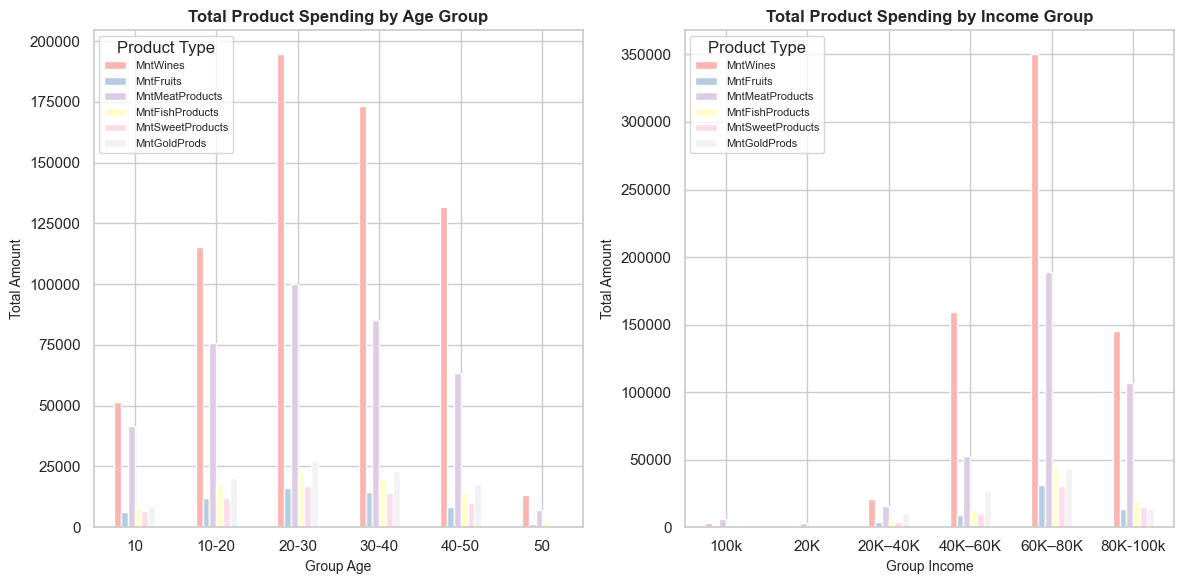

In [61]:
group_age_products = (df[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].groupby(df['Group Age'])).sum()
group_income_products = (df[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].groupby(df['Group Income'])).sum()

fig, axes = plt.subplots(1, 2, figsize=(12, 10))
group_age_products.plot(kind='bar', figsize=(12, 6), colormap='Pastel1', ax=axes[0])

axes[0].set_title("Total Product Spending by Age Group", fontsize=12, fontweight='bold')
axes[0].set_xlabel("Group Age", fontsize=10)
axes[0].set_ylabel("Total Amount", fontsize=10)
axes[0].tick_params(axis='x', rotation=0)
axes[0].legend(title="Product Type", loc='upper left', fontsize=8)

group_income_products.plot(kind='bar', figsize=(12, 6), colormap="Pastel1", ax= axes[1])
axes[1].set_title("Total Product Spending by Income Group", fontsize=12, fontweight='bold')
axes[1].set_xlabel("Group Income", fontsize=10)
axes[1].set_ylabel("Total Amount", fontsize=10)
axes[1].tick_params(axis='x', rotation=0)
axes[1].legend(title="Product Type", fontsize=8)
plt.tight_layout()
plt.show()

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2236 entries, 0 to 2239
Data columns (total 34 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2236 non-null   int64         
 1   Year_Birth           2236 non-null   int64         
 2   Education            2236 non-null   object        
 3   Marital_Status       2236 non-null   object        
 4   Income               2236 non-null   float64       
 5   Kidhome              2236 non-null   int64         
 6   Teenhome             2236 non-null   int64         
 7   Dt_Customer          2236 non-null   datetime64[ns]
 8   Recency              2236 non-null   int64         
 9   MntWines             2236 non-null   int64         
 10  MntFruits            2236 non-null   int64         
 11  MntMeatProducts      2236 non-null   int64         
 12  MntFishProducts      2236 non-null   int64         
 13  MntSweetProducts     2236 non-null   i

In [63]:
label_enc = LabelEncoder()
df_edu_feature = label_enc.fit_transform(df['Education'])
df_marital_feature = label_enc.fit_transform(df['Marital_Status'])
df_group_income = label_enc.fit_transform(df['Group Income'])
df_group_age = label_enc.fit_transform(df['Group Age'])
df['Edu Encoded'] = df_edu_feature
df['Marital Encoded'] = df_marital_feature
df['Group Income Encoded'] = df_group_income
df['Group Age Encoded'] = df_group_age

In [64]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Age', 'Tenure', 'Group Income', 'Group Age', 'Household Size',
       'Edu Encoded', 'Marital Encoded', 'Group Income Encoded',
       'Group Age Encoded'],
      dtype='object')

In [65]:
corr_matrix = df[['Tenure', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'Edu Encoded', 'Marital Encoded', 'Group Income Encoded','Group Age Encoded']]

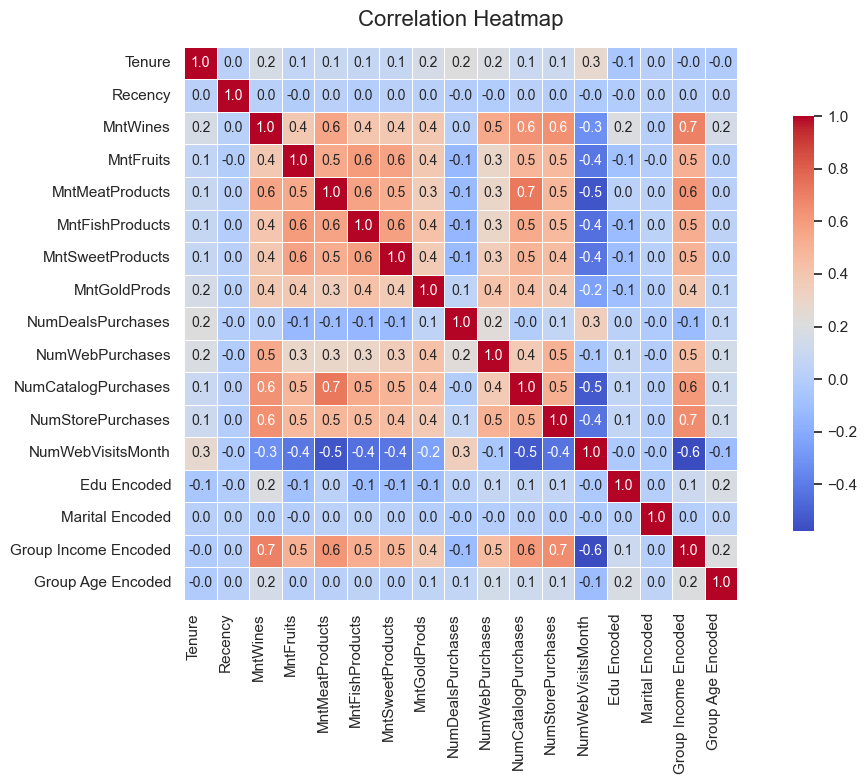

In [66]:
plt.figure(figsize=(12, 8))  # Increase figure size for readability
sns.heatmap(
    corr_matrix.corr(), 
    annot=True,             # Display correlation values
    fmt=".1f",              # Format to 2 decimal places
    cmap="coolwarm",        # Use a visually appealing color palette
    linewidths=0.5,         # Add lines between cells
    square=True,            # Make each cell square
    cbar_kws={"shrink": 0.75},  # Shrink color bar
    annot_kws={"size": 10}      # Annotation text size
)
plt.title("Correlation Heatmap", fontsize=16, pad=15)
plt.xticks(rotation=90, ha='right')  # Rotate x-axis labels for clarity
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

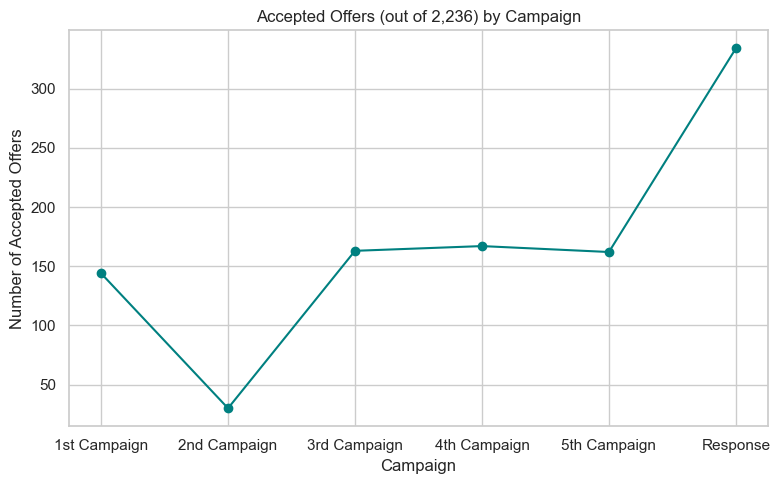

In [67]:
df_acc_1 = df['AcceptedCmp1'][df['AcceptedCmp1'] == 1].count()
df_acc_2 = df['AcceptedCmp2'][df['AcceptedCmp2'] == 1].count()
df_acc_3 = df['AcceptedCmp3'][df['AcceptedCmp3'] == 1].count()
df_acc_4 = df['AcceptedCmp4'][df['AcceptedCmp4'] == 1].count()
df_acc_5 = df['AcceptedCmp5'][df['AcceptedCmp5'] == 1].count()
df_resp = df['Response'][df['Response'] == 1].count()

x_labels = ["1st Campaign", "2nd Campaign", "3rd Campaign", "4th Campaign", "5th Campaign", "Response"]
y_values = [df_acc_1, df_acc_2, df_acc_3, df_acc_4, df_acc_5, df_resp]

# Plot
plt.figure(figsize=(8, 5))
plt.plot(x_labels, y_values, marker='o', linestyle='-', color='teal')
plt.title('Accepted Offers (out of 2,236) by Campaign')
plt.xlabel('Campaign')
plt.ylabel('Number of Accepted Offers')
plt.grid(True)
plt.tight_layout()
plt.show()

In [68]:
group_age_purchases = (df[['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']].groupby(df['Group Age'])).sum()
group_income_purchases = (df[['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']].groupby(df['Group Income'])).sum()

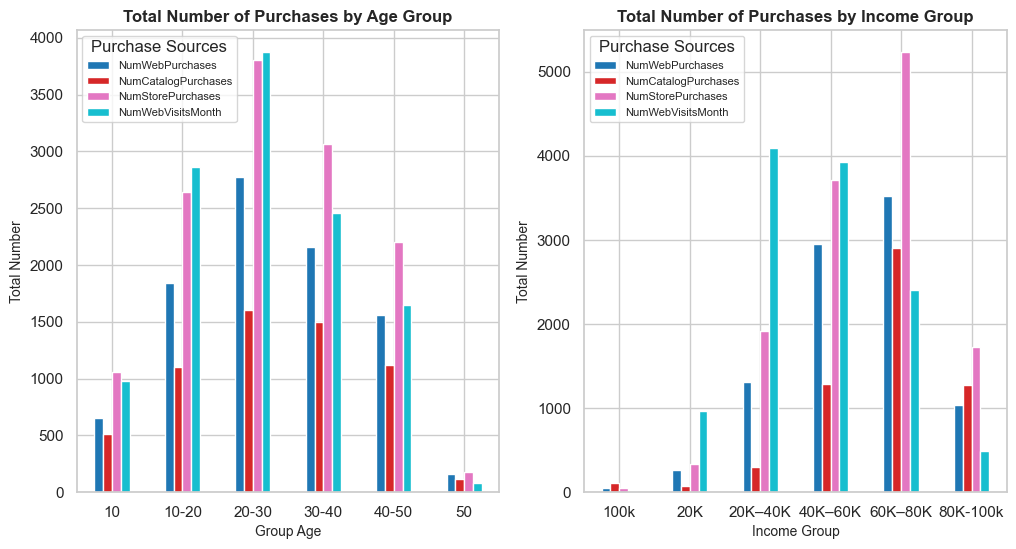

In [70]:
fig, axes = plt.subplots(1, 2, figsize=(12, 10))

group_age_purchases.plot(kind='bar', figsize=(12, 6), colormap='tab10', ax=axes[0])

axes[0].set_title("Total Number of Purchases by Age Group", fontsize=12, fontweight='bold')
axes[0].set_xlabel("Group Age", fontsize=10)
axes[0].set_ylabel("Total Number", fontsize=10)
axes[0].tick_params(axis='x', rotation=0)
axes[0].legend(title="Purchase Sources", loc='upper left', fontsize=8)

group_income_purchases.plot(kind='bar', figsize=(12, 6), colormap='tab10', ax=axes[1])
axes[1].set_title("Total Number of Purchases by Income Group", fontsize=12, fontweight='bold')
axes[1].set_xlabel("Income Group", fontsize=10)
axes[1].set_ylabel("Total Number", fontsize=10)
axes[1].tick_params(axis='x', rotation=0)
axes[1].legend(title="Purchase Sources", loc='upper left', fontsize=8)